Upgrade Package

In [1]:
!pip install tensorflow --upgrade
!pip install keras --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 439 kB 11.5 MB/s 
     |████████████████████████████████| 1.7 MB 62.2 MB/s 
     |████████████████████████████████| 6.0 MB 76.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

**Is good idea to Restart Runtime after updated packages**

# **Training**

In [2]:
from keras.models import Sequential, Model
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization

from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras import layers

def model(num_classes, input_shape):
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11,11), strides=(4,4), padding='valid'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

    # Passing it to a Fully Connected layer
    model.add(Flatten())
    # 1st Fully Connected Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.5))

    # 2nd Fully Connected Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    return model

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
import os

# Define constants
DATASET_PATH = './English/Fnt/'
MODEL_PATH = '.'
BATCH_SIZE = 128
EPOCHS = 20
TARGET_WIDTH = 128
TARGET_HEIGHT = 128
TARGET_DEPTH = 3

In [4]:
!wget https://raw.githubusercontent.com/Lienkaiyu/AlexNet-CharactersRecognition-colab/master/English.tar.gz
!tar -xf English.tar.gz

--2022-12-04 12:11:05--  https://raw.githubusercontent.com/Lienkaiyu/AlexNet-CharactersRecognition-colab/master/English.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32855155 (31M) [application/octet-stream]
Saving to: ‘English.tar.gz’

English.tar.gz      100%[===================>]  31.33M  --.-KB/s    in 0.1s    

2022-12-04 12:11:05 (256 MB/s) - ‘English.tar.gz’ saved [32855155/32855155]



In [5]:
# Set up the data generator to flow data from disk
print("[INFO] Setting up Data Generator...")
data_gen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_generator = data_gen.flow_from_directory(
    DATASET_PATH, 
    subset='training',
    target_size = (TARGET_WIDTH, TARGET_HEIGHT),
    batch_size = BATCH_SIZE
)

val_generator = data_gen.flow_from_directory(
    DATASET_PATH,
    subset='validation',
    target_size = (TARGET_WIDTH, TARGET_HEIGHT),
    batch_size = BATCH_SIZE
)

[INFO] Setting up Data Generator...
Found 29268 images belonging to 36 classes.
Found 7308 images belonging to 36 classes.


In [6]:
# Build model
print("[INFO] Compiling model...")
alexnet = model(train_generator.num_classes, (TARGET_WIDTH, TARGET_HEIGHT, TARGET_DEPTH))

# Compile the model
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

[INFO] Compiling model...


In [7]:
# Set the learning rate decay
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=2, min_lr=0.001)

In [8]:
# Train the network
print("[INFO] Training network ...")
H = alexnet.fit_generator(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps = val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS, verbose=1, callbacks=[reduce_lr])

# save the model to disk
print("[INFO] Serializing network...")
alexnet.save(MODEL_PATH + os.path.sep + "trained_model")

print("[INFO] Done!")

[INFO] Training network ...


<ipython-input-8-1d2021ec95e6>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = alexnet.fit_generator(


Epoch 1/20
228/228 [==============================] - 41s 109ms/step - loss: 1.9446 - accuracy: 0.4477 - val_loss: 0.3022 - val_accuracy: 0.9121 - lr: 0.0010
Epoch 2/20
228/228 [==============================] - 22s 98ms/step - loss: 0.3360 - accuracy: 0.9058 - val_loss: 0.1667 - val_accuracy: 0.9496 - lr: 0.0010
Epoch 3/20
228/228 [==============================] - 23s 102ms/step - loss: 0.1982 - accuracy: 0.9394 - val_loss: 0.1746 - val_accuracy: 0.9539 - lr: 0.0010
Epoch 4/20
228/228 [==============================] - 23s 101ms/step - loss: 0.1580 - accuracy: 0.9514 - val_loss: 0.1833 - val_accuracy: 0.9379 - lr: 0.0010
Epoch 5/20
228/228 [==============================] - 23s 100ms/step - loss: 0.1377 - accuracy: 0.9573 - val_loss: 0.1713 - val_accuracy: 0.9570 - lr: 0.0010
Epoch 6/20
228/228 [==============================] - 23s 102ms/step - loss: 0.1157 - accuracy: 0.9630 - val_loss: 0.2105 - val_accuracy: 0.9557 - lr: 0.0010
Epoch 7/20
228/228 [==============================] -

[INFO] Done!


# Prediction

Downloading Sample test data.



In [9]:
!wget https://raw.githubusercontent.com/Lienkaiyu/AlexNet-CharactersRecognition-colab/master/test1.png
!wget https://raw.githubusercontent.com/Lienkaiyu/AlexNet-CharactersRecognition-colab/master/test2.png
!wget https://raw.githubusercontent.com/Lienkaiyu/AlexNet-CharactersRecognition-colab/master/test3.png
!wget https://raw.githubusercontent.com/Lienkaiyu/AlexNet-CharactersRecognition-colab/master/test4.png

--2022-12-04 12:22:11--  https://raw.githubusercontent.com/Lienkaiyu/AlexNet-CharactersRecognition-colab/master/test1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8975 (8.8K) [image/png]
Saving to: ‘test1.png’

test1.png           100%[===================>]   8.76K  --.-KB/s    in 0s      

2022-12-04 12:22:11 (87.2 MB/s) - ‘test1.png’ saved [8975/8975]

--2022-12-04 12:22:11--  https://raw.githubusercontent.com/Lienkaiyu/AlexNet-CharactersRecognition-colab/master/test2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97

In [10]:
import argparse
import numpy as np
from keras.models import load_model
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array, array_to_img
import cv2
import matplotlib.pyplot as plt 

# Construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True, help="path to input image")
#args = vars(ap.parse_args())

labels = [
    '0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G',
    'H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'
    ]

# Define constants
TARGET_WIDTH = 128
TARGET_HEIGHT = 128
MODEL_PATH = './trained_model'


def predict(IMG, Plt_location = 1):
  # Load the image
  #original_image = cv2.imread(args["image"])
  original_image = cv2.imread(IMG)


  # Preprocessing the image
  image = cv2.resize(original_image, (TARGET_WIDTH, TARGET_HEIGHT))
  image = image.astype("float") / 255.0
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)

  # Load the trained convolutional neural network
  print("[INFO] Loading my model...")
  model = load_model(MODEL_PATH, compile=False)

  # Classify the input image then find the index of the class with the *largest* probability
  print("[INFO] Classifying image...")
  prob = model.predict(image)[0]
  idx = np.argsort(prob)[-1]

  plt.figure(figsize=(10,10))

  # Display original image
  #cv2.imshow("Original Image", original_image)
  #cv2.imwrite("result.jpg", original_image)
  #plt.subplot(121)
  #plt.imshow(original_image)  


  #cv2.waitKey(0);

  # Display the predicted image
  cv2.putText(original_image, 'Character is ' + labels[idx], 
      (10, 100), 
      cv2.FONT_HERSHEY_SIMPLEX, 
      2,
      (255,0,255),
      2)
  #cv2.imshow("Recognised Image", original_image)
  #cv2.imwrite("result.jpg", original_image)
  #plt.subplot(2,2,Plt_location)
  plt.imshow(original_image)  
  #cv2.waitKey(0)
  del idx

[INFO] Loading my model...
[INFO] Classifying image...
1/1 [==============================] - 0s 293ms/step
[INFO] Loading my model...
[INFO] Classifying image...
1/1 [==============================] - 0s 96ms/step
[INFO] Loading my model...
[INFO] Classifying image...
1/1 [==============================] - 0s 114ms/step
[INFO] Loading my model...
[INFO] Classifying image...
1/1 [==============================] - 0s 97ms/step


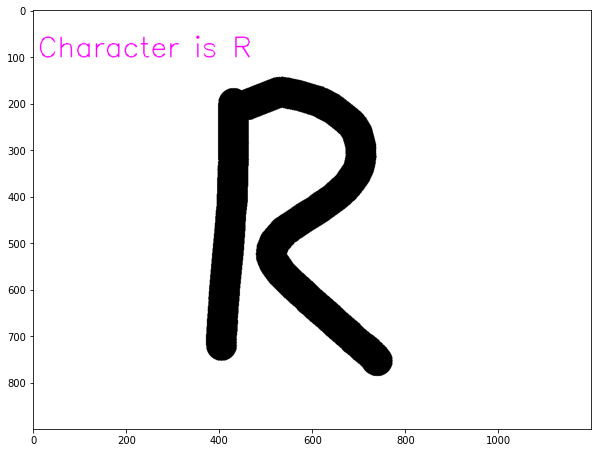

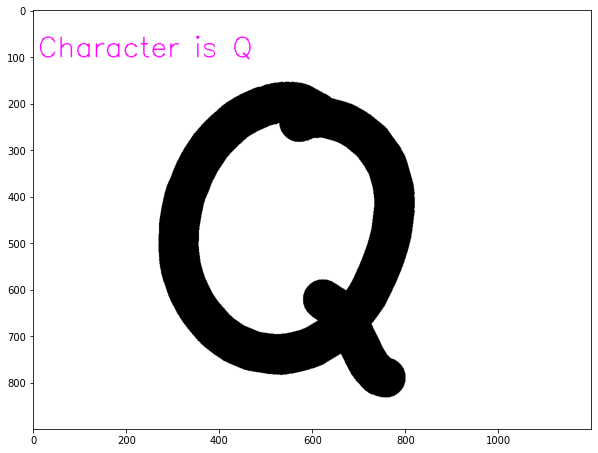

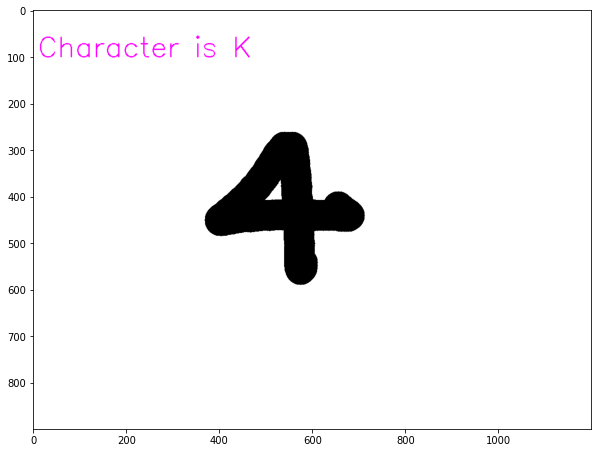

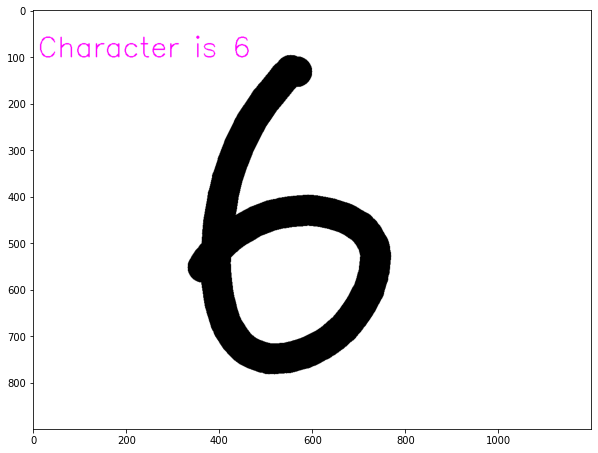

In [11]:
predict("test1.png",1)
predict("test2.png",2)
predict("test3.png",3)
predict("test4.png",4)